In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
from fastai.vision.all import *
from pathlib import Path


import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [3]:
DATA = Path('/kaggle/input/')
path = DATA/'lyft-udacity-challenge'/'dataB'/'dataB'


dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'CameraRGB'),
    label_func = lambda o: path/'CameraRGB'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)



In [4]:

dls = SegmentationDataLoaders.from_label_func(
    path, bs=4, fnames = get_image_files(path/"CameraRGB"),
    label_func = lambda o: path/'CameraSeg'/f'{o.stem}{o.suffix}',
    codes=None
)



In [5]:
??SegmentationDataLoaders

In [6]:
?unet_learner

In [7]:
learn = unet_learner(dls, resnet34, n_out = 12)
learn.fine_tune(3)
     

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.144575,1.084475,02:51


epoch,train_loss,valid_loss,time
0,0.182682,0.153648,02:52
1,0.100484,0.089938,02:53
2,0.070608,0.075328,02:53


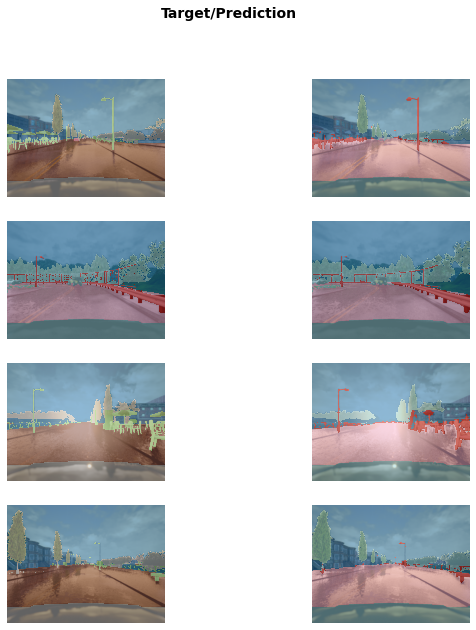

In [8]:
learn.show_results(max_n=6, figsize=(10,10))

In [9]:
test_img=(DATA/'lyft-udacity-challenge'/'dataC'/'dataC'/'CameraRGB').ls()[0]

In [10]:
test_pred = learn.predict(test_img)


In [11]:
test_pred

(TensorMask([[0, 0, 0,  ..., 0, 0, 3],
         [0, 0, 0,  ..., 0, 0, 3],
         [0, 0, 0,  ..., 0, 0, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]]),
 TensorBase([[0, 0, 0,  ..., 0, 0, 3],
         [0, 0, 0,  ..., 0, 0, 3],
         [0, 0, 0,  ..., 0, 0, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]]),
 TensorBase([[[9.1501e-01, 9.6645e-01, 9.9298e-01,  ..., 5.9178e-01,
           5.1777e-01, 3.3054e-01],
          [9.7506e-01, 9.9508e-01, 9.9892e-01,  ..., 5.9890e-01,
           5.3949e-01, 3.7345e-01],
          [9.8990e-01, 9.9843e-01, 9.9904e-01,  ..., 6.2526e-01,
           6.5822e-01, 4.0933e-01],
          ...,
          [6.2091e-03, 4.4993e-03, 1.9047e-03,  ..., 2.7638e-05,
           1.1580e-04, 2.7148e-04],
          [2.5381e-02, 1.2228e-02, 1.6687e-03,  ..., 8.6692e-06,
           2.3781e-04, 1.2468e-03],
          [2.605

In [12]:
from PIL import Image

In [13]:
pred_mask = test_pred[0]

In [14]:
pred_b1 = test_pred[1]
pred_b2 = test_pred[2]

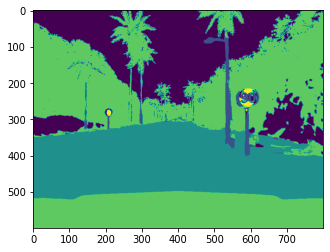

In [15]:
plt.imshow(pred_mask)

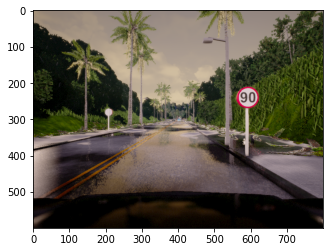

In [16]:
plt.imshow(plt.imread(test_img))

In [17]:
tst_img = plt.imread(test_img)

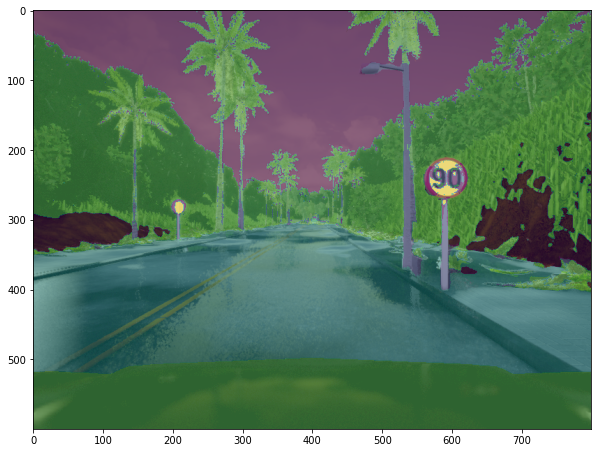

In [18]:
plt.figure(figsize = (10,10))
plt.imshow(tst_img)
plt.imshow(pred_mask, alpha=0.5)

In [19]:
plt.savefig('segmented.jpg')

<Figure size 432x288 with 0 Axes>

In [20]:
#learn.export('model.pkl')

In [21]:
#Hide
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 71.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=38ced73e3abbe544e8cf88808209a23f13a0957396b859806aa35e5ee63c458f
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=746894103f72252b6a1e0bee0711ae95037e0b8899e3e0e8ecf64374ff964bc1
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built ffmpy python-multipart


In [22]:
import gradio as gr
def segment(image):
    
    pred = learn.predict(image)
    pred_mask = pred[0]
    img = plt.imread(image)
    plt.figure(figsize = (10,10))
    plt.imshow(img)
    plt.imshow(pred_mask, alpha=0.5)
    output = Path('/kaggle/working/segmented.jpg')
    return output


gr.Interface(fn=segment, inputs="image", outputs="image").launch(share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://65dd4dfa-b662-4667.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
